<a href="https://colab.research.google.com/github/thejaswin123/Exploratory_data_analysis_cars/blob/master/Exploratory_data_analysis_cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXPLORATORY DATA ANALYSIS (EDA)
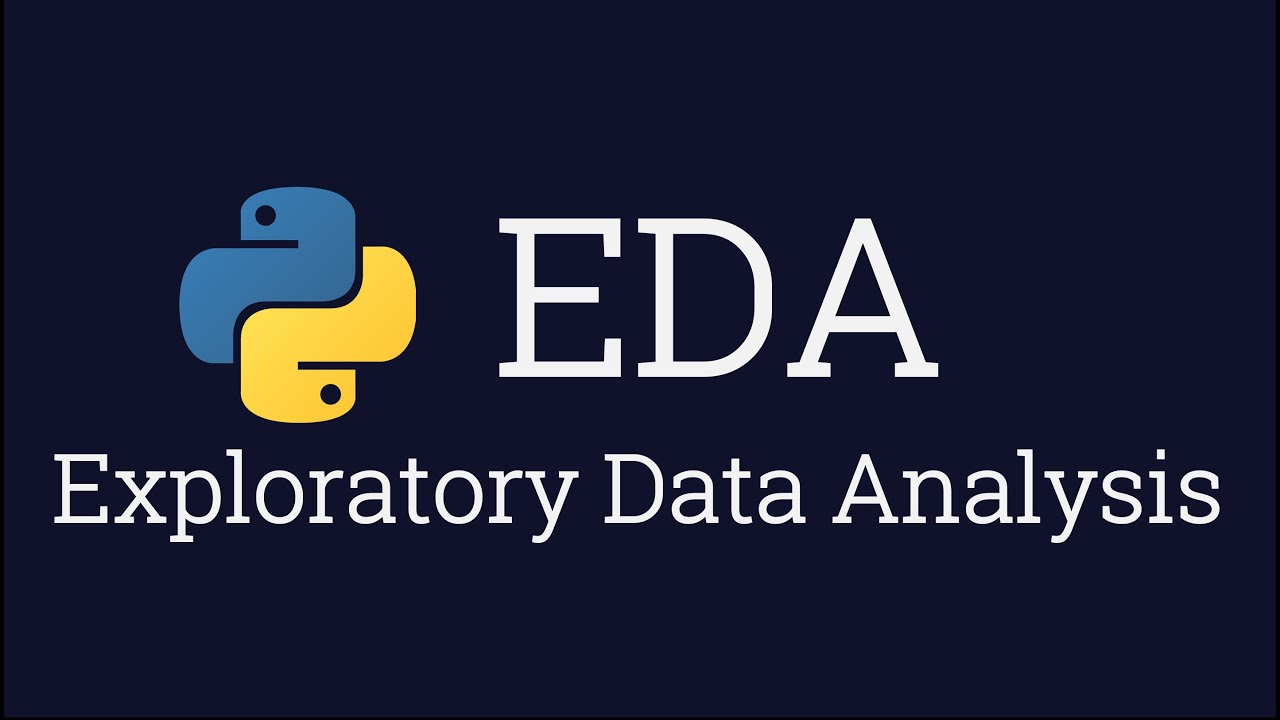 

# **What is EDA??**
Exploratory data analysis, or EDA, is a (mainly) visual approach and philosophy that focuses on the initial ways by which one should explore a data set or experiment. 

EDA is used for:


*   Catching mistakes and anomalies
*   Gaining new insights into data
*   Detecting outliers in data
*   Testing assumptions
*   Identifying important factors in the data
*   Understanding relationships
   










# ***1. Importing the required libraries for EDA*** 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


To load Dataset into Colab


In [2]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


# **1.1 Loading the data into the data frame.**

In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['data.csv']))

In [4]:
df.head(5) 

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
df.tail()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


# **1.2 Checking the types of data and basic summary stats**

Here we check for the datatypes because sometimes the MSRP or the price of the car would be stored as a string, if in that case, we have to convert that string to the integer data only then we can plot the data via a graph. Here, in this case, the data is already in integer format so nothing to worry.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [7]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


# **2. Dropping irrelevant columns**

This step is certainly needed in EDA because sometimes there would be columns that we never use and in such cases dropping is useful. In this case, the columns such as Engine Fuel Type and Number of doors maynot be very relevant.

In [8]:
df = df.drop(['Engine Fuel Type', 'Number of Doors','Market Category'], axis=1) 
df.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


# **3. Renaming the columns**

In [9]:
df = df.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price" })
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


# **4. Dropping the duplicate rows**

Here we remove all the duplicate value from the data-set.

In [10]:
df.shape

(11914, 13)

In [11]:
duplicate_rows_df=df[df.duplicated()]
print("no of duplicate rows:",duplicate_rows_df.shape)

no of duplicate rows: (792, 13)


In [12]:
df=df.drop_duplicates()
df.head()


,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


In [13]:
df.shape

(11122, 13)

# **4.1 Dropping the missing or null values.**

This helps in fine tuning the model performance as more the data, a model has the better it performs.

In [14]:
print(df.isnull().sum())

Make              0
Model             0
Year              0
HP               69
Cylinders        30
Transmission      0
Drive Mode        0
Vehicle Size      0
Vehicle Style     0
MPG-H             0
MPG-C             0
Popularity        0
Price             0
dtype: int64


In [15]:
df=df.dropna()
df.count()

Make             11024
Model            11024
Year             11024
HP               11024
Cylinders        11024
Transmission     11024
Drive Mode       11024
Vehicle Size     11024
Vehicle Style    11024
MPG-H            11024
MPG-C            11024
Popularity       11024
Price            11024
dtype: int64

In [16]:
print(df.isnull().sum())

Make             0
Model            0
Year             0
HP               0
Cylinders        0
Transmission     0
Drive Mode       0
Vehicle Size     0
Vehicle Style    0
MPG-H            0
MPG-C            0
Popularity       0
Price            0
dtype: int64


# **5. Detecting Outliers**

In statistics, an outlier is an observation point that is distant from other observations.The outliers can be a result of a mistake during data collection or it can be just an indication of variance in your data.If there is an outlier it will plotted as point in boxplot but other population will be grouped together and display as boxes.
Box plots have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles.
For detecting Outliers Scatter plot and box plot are better

plotting boxplot for price

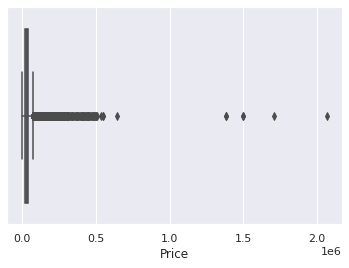

In [17]:
sns.boxplot(df['Price'])

plotting boxplot for HP

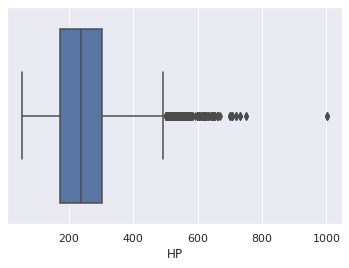

In [18]:
sns.boxplot(df['HP'])

Plotting Boxplot for Cylinder

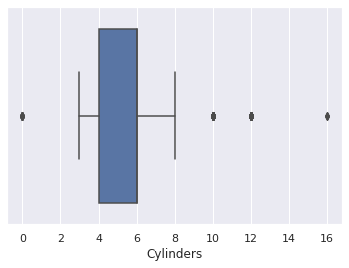

In [19]:
sns.boxplot(df['Cylinders'])

The interquartile range (IQR), also called the midspread or middle 50%, or technically H-spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q3 − Q1.
It is a measure of the dispersion similar to standard deviation or variance, but is much more robust against outliers.

In [20]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(IQR)

Year              9.00
HP              131.00
Cylinders         2.00
MPG-H             8.00
MPG-C             6.00
Popularity     1460.00
Price         21426.25
dtype: float64


The data point where we have False that means these values are valid whereas True indicates presence of an outlier.

In [21]:
df=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(8546, 13)

# **6. What are the most represented car brands ?**

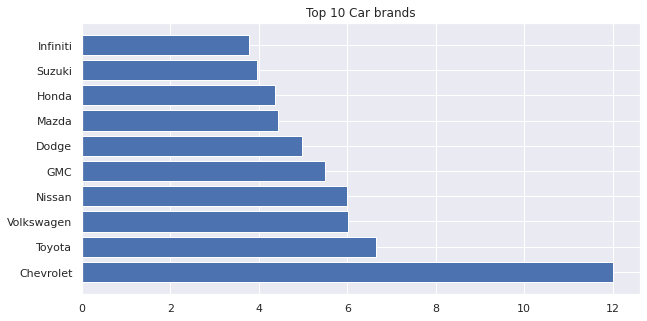

In [22]:
# Percentage of car per brand
counts = df['Make'].value_counts()*100/sum(df['Make'].value_counts())

# Top 10 car brands
popular_labels = counts.index[:10]
    
# Plot
plt.figure(figsize=(10,5))
plt.barh(popular_labels, width=counts[:10])
plt.title('Top 10 Car brands')
plt.show()

In [23]:
prices = df[['Make','Price']].loc[(df['Make'] == 'Chevrolet')|
               (df['Make'] == 'Ford')|
               (df['Make'] == 'Volkswagen')|
               (df['Make'] == 'Toyota')|
               (df['Make'] == 'Dodge')|
               (df['Make'] == 'Nissan')|
               (df['Make'] == 'GMC')|
               (df['Make'] == 'Honda')|
               (df['Make'] == 'Mazda')].groupby('Make').mean()
print(prices)

                   Price
Make                    
Chevrolet   28142.855891
Dodge       26076.722353
GMC         33261.400853
Honda       27381.364611
Mazda       20495.820106
Nissan      28352.543860
Toyota      27769.421793
Volkswagen  29032.817476


# **7.Correlation matrix**

In [24]:
df.corr()

,Year,HP,Cylinders,MPG-H,MPG-C,Popularity,Price
Year,1.000000,0.325104,-0.106597,0.373319,0.335236,0.200710,0.591439
HP,0.325104,1.000000,0.734094,-0.453451,-0.554768,0.095161,0.745852
Cylinders,-0.106597,0.734094,1.000000,-0.691395,-0.746361,0.013373,0.389049
MPG-H,0.373319,-0.453451,-0.691395,1.000000,0.936978,0.093002,-0.121262
MPG-C,0.335236,-0.554768,-0.746361,0.936978,1.000000,0.081110,-0.197330
Popularity,0.200710,0.095161,0.013373,0.093002,0.081110,1.000000,0.113604
Price,0.591439,0.745852,0.389049,-0.121262,-0.197330,0.113604,1.000000


From the above corrolation matrix, High correlation is observed between

Cylinders & HP

highway mpg & City mpg

High anticorrelation is observed between 

Cylinders & highway mpg

Highway mpg / Engine Cylinders have a strong negative correlation with highway and city MPG because lower MPG figures mean higher fuel consumption.

# **8.Exploratory Data Analysis**

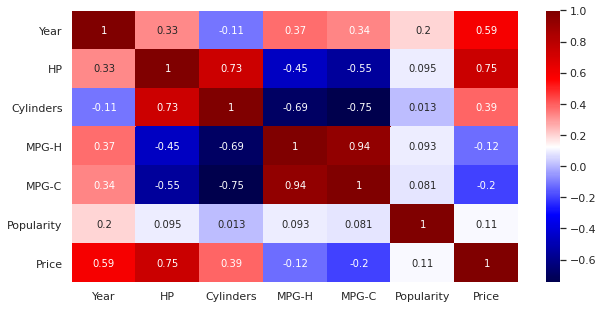

In [25]:
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="seismic",annot=True)

Here i used scatter plots to find the correlation between two variables i.e between Horsepower and Price .With the plot given below, we can easily draw a trend line.

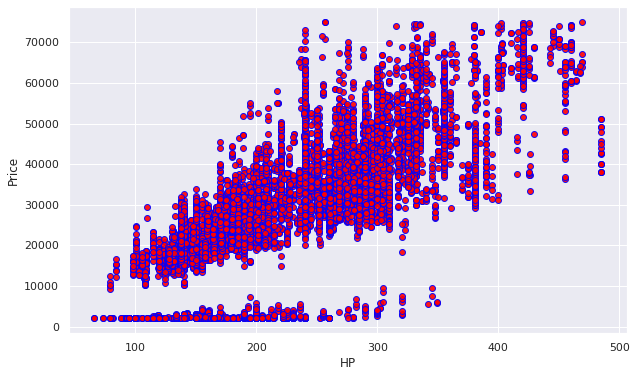

In [26]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['HP'], df['Price'],color='red',alpha=0.9,edgecolors='blue')
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()

which vehicle style segment of car sold the most?

Text(0.5, 0, 'body type')

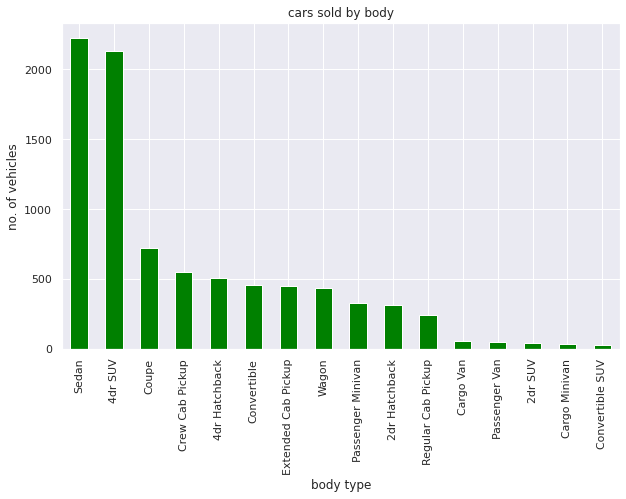

In [27]:

df['Vehicle Style'].value_counts().plot.bar(figsize=(10,6),color='green')
plt.title("cars sold by body")
plt.ylabel("no. of vehicles")
plt.xlabel("body type")

Here from the chart we can see that Sedan cars were the most sold cars followed by 4dr SUV

Text(0.5, 0, 'Count of vehicles')

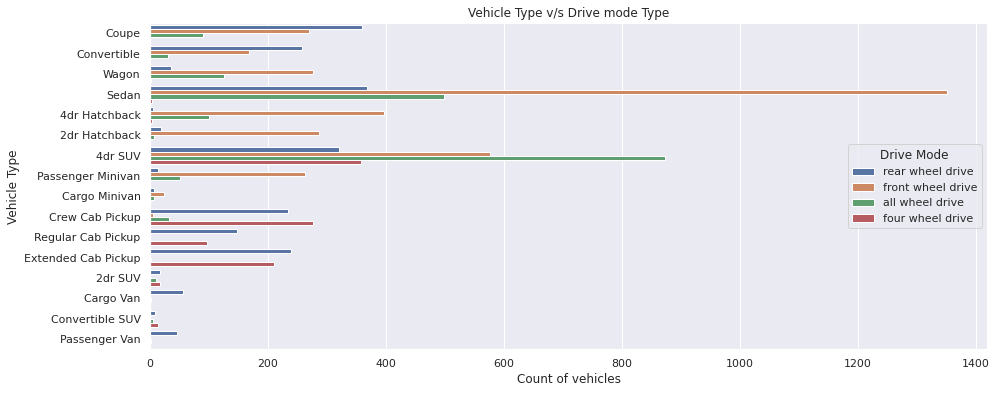

In [28]:
#vehicle style.type and drive type analysis
plt.figure(figsize=(15,6))
sns.countplot(y='Vehicle Style',data=df, hue='Drive Mode')
plt.title("Vehicle Type v/s Drive mode Type")
plt.ylabel('Vehicle Type')
plt.xlabel('Count of vehicles')


From the above plot we can see Sedan with front wheel drive mode and 4dr SUV with all wheel drive mode is sold most and then followed by front wheel drive.

Making a New group "Price_group"

In [29]:
# Create a new column 'Price_group' and assign the value based on car price
df['price_group']=pd.cut(df['Price'],[0,20000,40000,60000,80000,100000,600000],labels=['<20k','20k-39k','40k-59k','60k-79k','80k-99k','>100k'],include_lowest=True)
df['price_group']=df['price_group'].astype(object)

Text(0, 0.5, '% of vehicles')

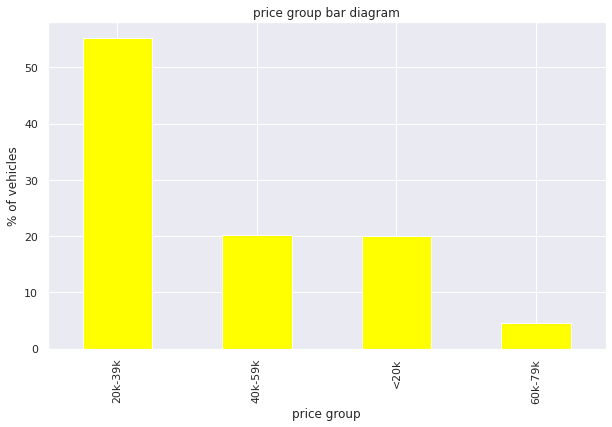

In [56]:
(df['price_group'].value_counts()/len(df)*100).plot.bar(figsize=(10,6),color='yellow')
plt.title('price group bar diagram')
plt.xlabel('price group')
plt.ylabel('% of vehicles')

From the above Bar chart we can see that more than 50% of vehicles sold is in the price group of 20k-39k and then followed by 40-59k and <20k and 60-79k with the least. 

# **9. Base ML**

In [31]:
X = df[['Popularity', 'Year', 'HP', 'Cylinders', 'MPG-H', 'MPG-C']].values
y = df['Price'].values

Feature Scaling is a technique to standardize the independent features present in the data in a fixed range. ... If feature scaling is not done, then a machine learning algorithm tends to weigh greater values, higher and consider smaller values as the lower values, regardless of the unit of the values.

In [32]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1,1))

In [33]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [34]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

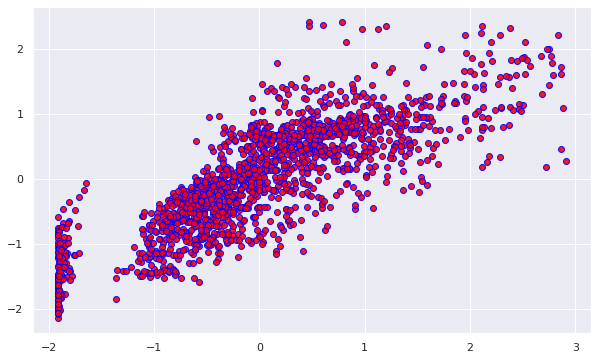

In [35]:
# Predicting the Test set results

plt.figure(figsize=(10,6))
y_pred = regressor.predict(X_test)
plt.scatter(y_test,y_pred,color='red',alpha=0.9,edgecolors='blue')


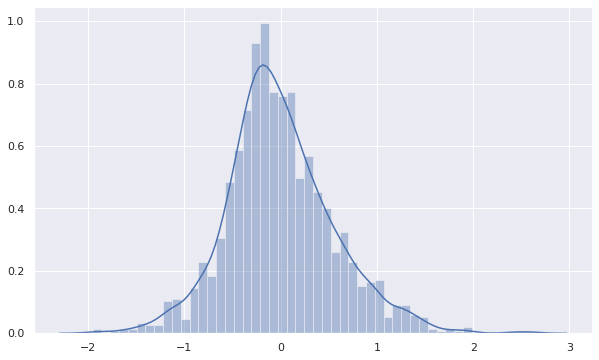

In [36]:
plt.figure(figsize=(10,6))
sns.distplot((y_test-y_pred),bins=50)

In [37]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.4256788993790108
Root Mean Squared Error: 0.5578433473146853
R2 Score: 0.6800475541161142


# **10. Spot checking algorithms**

In [38]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

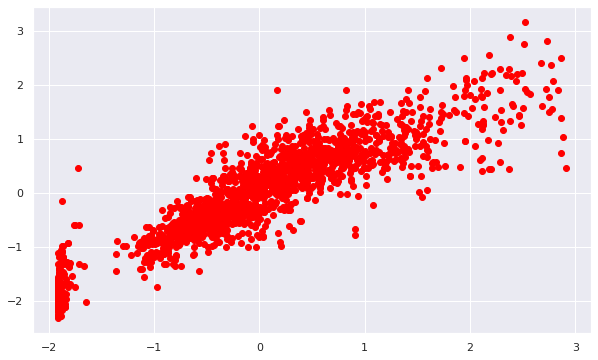

In [39]:
# Predicting a new result with Polynomial Regression
plt.figure(figsize=(10,6))
y_pred=lin_reg_2.predict(poly_reg.fit_transform(X_test))
plt.scatter(y_test,y_pred,c='red')

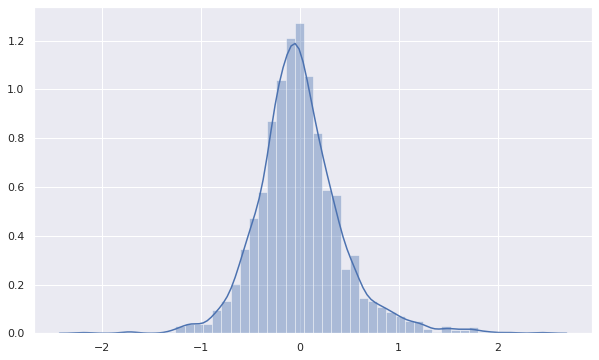

In [40]:
plt.figure(figsize=(10,6))
sns.distplot((y_test-y_pred),bins=50)

In [41]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.31573061752350967
Root Mean Squared Error: 0.4351456478672659
R2 Score: 0.8053160242314694


In [42]:
# Fitting SVR to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

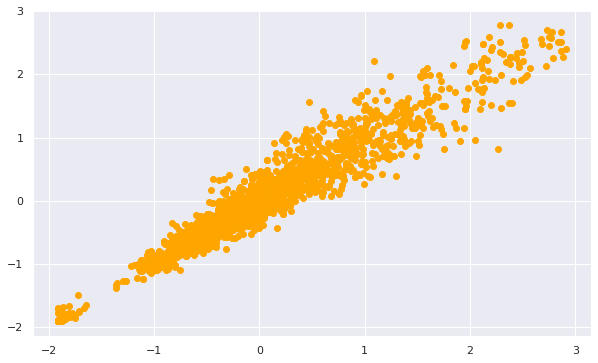

In [50]:
# Predicting a new result
plt.figure(figsize=(10,6))
y_pred = regressor.predict(X_test)
plt.scatter(y_test,y_pred,c='orange')

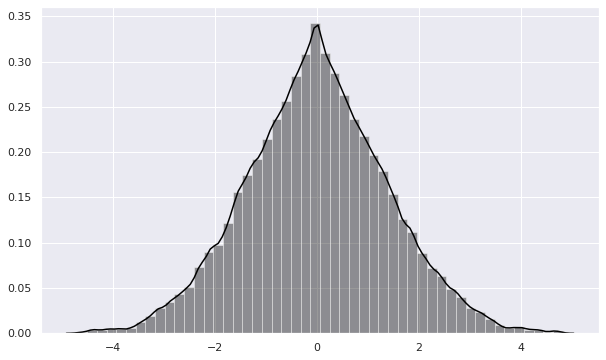

In [66]:
plt.figure(figsize=(10,6))
sns.distplot((y_test-y_pred),bins=50,rug_kws={"color": "r"},color='black',norm_hist=True,)

In [45]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.29633619416546725
Root Mean Squared Error: 0.42527355451237575
R2 Score: 0.814049362176249


In [46]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
regressor.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

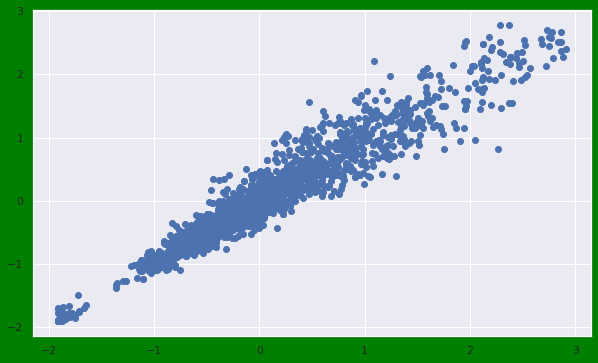

In [62]:
plt.figure(figsize=(10,6),facecolor='green')
y_pred = regressor.predict(X_test)
plt.scatter(y_test,y_pred)

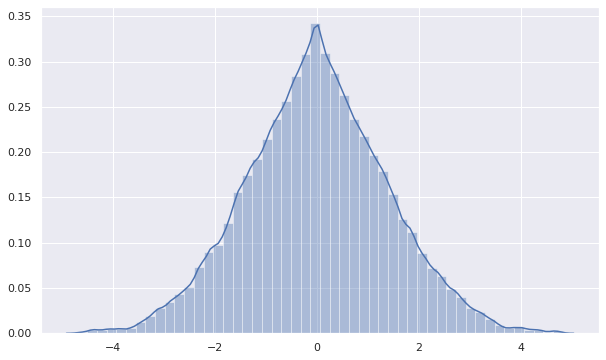

In [48]:
plt.figure(figsize=(10,6))
sns.distplot((y_test-y_pred),bins=50)

In [49]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.17769704010247667
Root Mean Squared Error: 0.24743996001244517
R2 Score: 0.9370492959370332
